In [1]:
# !pip install mglearn

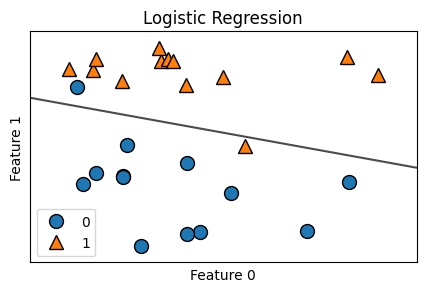

In [2]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X, y = mglearn.datasets.make_forge()

clf = LogisticRegression().fit(X, y)

fig, ax = plt.subplots(figsize=(5, 3))

mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

ax.set_title("Logistic Regression")
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.legend()

plt.show()

In [3]:
X, y = mglearn.datasets.make_forge()
X.shape, y.shape, X.dtype, y.dtype

((26, 2), (26,), dtype('float64'), dtype('int64'))

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
logreg = LogisticRegression(max_iter=10000, C=1).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


(426, 30) (143, 30) (426,) (143,)
Training set score: 0.958
Test set score: 0.958


In [5]:
logreg100 = LogisticRegression(max_iter=10000, C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.981
Test set score: 0.965


In [ ]:
logreg001 = LogisticRegression(max_iter=10000, C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.951


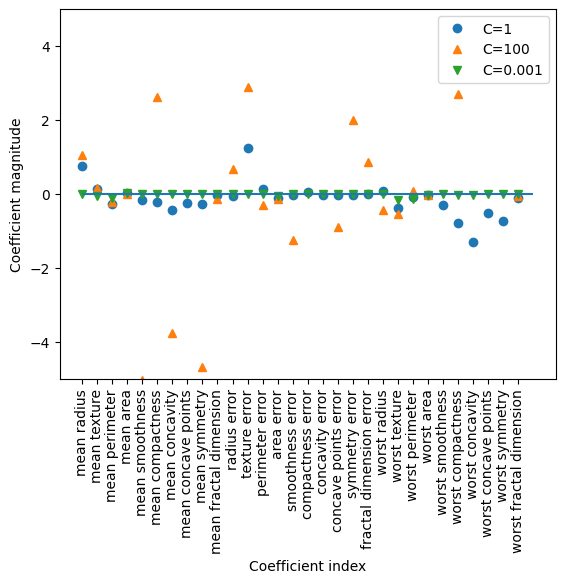

In [ ]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


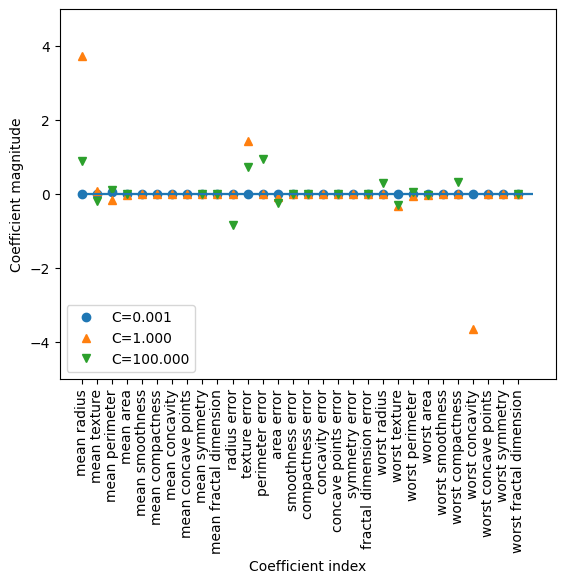

In [8]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
 lr_l1 = LogisticRegression(C=C, penalty="l1", solver="liblinear").fit(X_train, y_train)
 print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
 C, lr_l1.score(X_train, y_train)))
 print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
 C, lr_l1.score(X_test, y_test)))
 plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
 plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
 plt.hlines(0, 0, cancer.data.shape[1])
 plt.xlabel("Coefficient index")
 plt.ylabel("Coefficient magnitude")
 plt.ylim(-5, 5)
 plt.legend(loc=3)